<a href="https://colab.research.google.com/github/jeromepatel/GDSC-AI-ML-Session-Oct-2021/blob/master/Learning_NLP_Basics_with_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to NLP
##Concise guide to natural language processing fundamentals

**Note : Create a copy of the notebook and use the copy to complete tasks throughout the session. Go to File > Save a Copy in Drive to create a new copy, good luck and have fun!**

Language is a method of communication with the help of which we can speak, read and write. For example, we think, we make decisions, plans and more in natural language; precisely, in words. However, the big question that confronts us in this AI era is that can we communicate in a similar manner with computers. In other words, can human beings communicate with computers in their natural language? It is a challenge for us to develop NLP applications because computers need structured data, but human speech is unstructured and often ambiguous in nature.
</br>
</br>
In this sense, we can say that Natural Language Processing (NLP) is the sub-field of Computer Science especially Artificial Intelligence (AI) that is concerned about enabling computers to understand and process human language. Technically, the main task of NLP would be to program computers for analyzing and processing huge amount of natural language data.




Let's take a look XKCD comic, you can check this out [here](https://xkcd.com/1576/):
![image.png](https://imgs.xkcd.com/comics/i_could_care_less_2x.png)


### History of NLP
We have divided the history of NLP into four phases. The phases have distinctive concerns and styles.

**First Phase (Machine Translation Phase) - Late 1940s to late 1960s**

The work done in this phase focused mainly on machine translation (MT). This phase was a period of enthusiasm and optimism.

Let us now see all that the first phase had in it −

* The research on NLP started in early 1950s after Booth & Richens’ investigation and Weaver’s memorandum on machine translation in 1949.
 
* 1954 was the year when a limited experiment on automatic translation from Russian to English demonstrated in the Georgetown-IBM experiment.
 
* In the same year, the publication of the journal MT (Machine Translation) started.
 
* The first international conference on Machine Translation (MT) was held in 1952 and second was held in 1956.
 
* In 1961, the work presented in Teddington International Conference on Machine Translation of Languages and Applied Language analysis was the high point of this phase.

**Second Phase (AI Influenced Phase) – Late 1960s to late 1970s**

In this phase, the work done was majorly related to world knowledge and on its role in the construction and manipulation of meaning representations. That is why, this phase is also called AI-flavored phase.

The phase had in it, the following −

* In early 1961, the work began on the problems of addressing and constructing data or knowledge base. This work was influenced by AI.
 
* In the same year, a BASEBALL question-answering system was also developed. The input to this system was restricted and the language processing involved was a simple one.
 
* A much advanced system was described in Minsky (1968). This system, when compared to the BASEBALL question-answering system, was recognized and provided for the need of inference on the knowledge base in interpreting and responding to language input.

**Third Phase (Grammatico-logical Phase) – Late 1970s to late 1980s**

This phase can be described as the grammatico-logical phase. Due to the failure of practical system building in last phase, the researchers moved towards the use of logic for knowledge representation and reasoning in AI.

The third phase had the following in it −

* The grammatico-logical approach, towards the end of decade, helped us with powerful general-purpose sentence processors like SRI’s Core Language Engine and Discourse Representation Theory, which offered a means of tackling more extended discourse.
 
* In this phase we got some practical resources & tools like parsers, e.g. Alvey Natural Language Tools along with more operational and commercial systems, e.g. for database query.
 
* The work on lexicon in 1980s also pointed in the direction of grammatico-logical approach.

**Fourth Phase (Lexical & Corpus Phase) – The 1990s**

We can describe this as a lexical & corpus phase. The phase had a lexicalized approach to grammar that appeared in late 1980s and became an increasing influence. There was a revolution in natural language processing in this decade with the introduction of machine learning algorithms for language processing.


## Goal: Apply NLP Preprocessing to the dataset and Use simple classifier
ML algorithms can't understand words (they are not that smart!), we need to convert words into numerical, machine understandable form. That's where natural language processing comes in. We will be using basic preprocessing steps in this task to convert tweets into vectors which ww will further use for training model.

In [1]:
#importing libraries

import pandas as pd
# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


## Text Preprocessing Example

#### 1. **Data Cleaning:**

Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. Some of the basic text pre-processing techniques includes:
* Make text all **lower case or uppercase** so that the algorithm does not treat the same words in different cases as different
* **Removing Noise:** i.e everything that isn’t in a standard number or letter i.e Punctuation, Numerical values, common non-sensical text (/n)
* **Tokenization:** Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.
*  **Stopword Removal:** Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words




### 2. **Advanced Preprocessing:**
* **Stemming:** Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.
* **Lemmatization:** A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.
Parts of speech tagging
Create bi-grams or tri-grams And more.

However, it is not necessary that you would need to use all these steps. The usage depends on your problem at hand. Sometimes removal of stop words helps while at other times, this might not help.Here is a nice table taken from the blog titled : [All you need to know about Text Preprocessing for Machine Learning & NLP](https://kavita-ganesan.com/text-preprocessing-tutorial/#.Xi2BhhczZTY) that summarizes how much preprocessing you should be performing on your text data:

![image.png](https://kavita-ganesan.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-23-at-1.36.52-PM-590x270.png)

**Getting the example dataset for preprocessing:**
The dataset is called spooky author identification and can be found [here](https://www.kaggle.com/c/spooky-author-identification/data)

It proposes a well known classical classification problem, which we are going to tackle using ML (yes USING THE machine learning, although not that fancy)

In [2]:
#Example dataset for preprocessing demonstration

#fetch the dataset
example_data_URL = 'https://raw.githubusercontent.com/jeromepatel/GDSC-AI-ML-Session-Oct-2021/master/train_example_spooky_authors.csv'
example_data = pd.read_csv(example_data_URL)

#little peak into the data
example_data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


Apply clean text function which does exactly what it tells, cleans text using regular expressions, for more info on RegEx, check [this](https://www.geeksforgeeks.org/write-regular-expressions/) out

In [3]:
# Applying a first round of text cleaning techniques

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets, next line crucial in this cell, it applies above function to the dataset
example_data['text'] = example_data['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
example_data['text'].head()

0    this process however afforded me no means of a...
1    it never once occurred to me that the fumbling...
2    in his left hand was a gold snuff box from whi...
3    how lovely is spring as we looked from windsor...
4    finding nothing else not even gold the superin...
Name: text, dtype: object

* **Extra stuff:**  a lambda function is just like any normal python function, except that it has no name when defining it, and it is contained in one line of code.
```python
#Normal python function
def a_name(x):
    return x+x
#Lambda function
lambda x: x+x
```



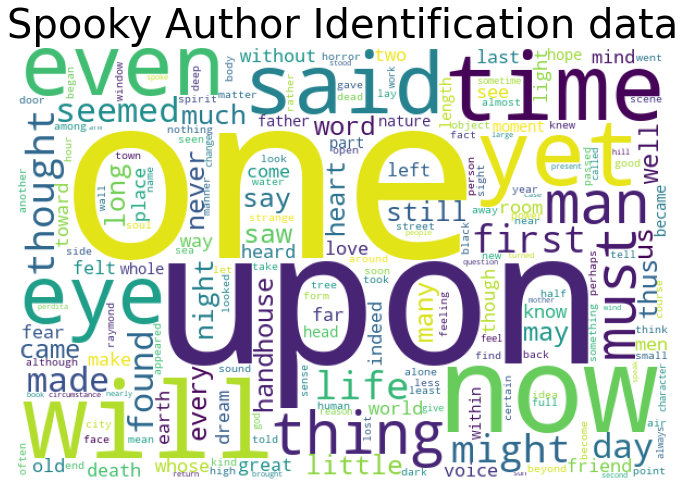

In [4]:
#@title WordCloud For Fun! { display-mode: "form" }
# NOT IMPORTANT, YOU CAN IGNORE THIS CELL
from wordcloud import WordCloud
fig, ax1  = plt.subplots(1, 1, figsize=[13, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(example_data['text']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Spooky Author Identification data',fontsize=40);


### **2. Tokenization**

Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc. Base upon the type of tokens we want, tokenization can be of various types, for instance


In [5]:
# Tokenizing the example dataset

#different type of tokenizers 
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')


def tokenize(text):
    """
    Tokenize the given sentence using regex tokenizer
    
    """
    #first define tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    #now apply tokenizer
    return tokenizer.tokenize(text)

example_data['text'] = example_data['text'].apply(lambda x: tokenize(x))
example_data['text'].head()

0    [this, process, however, afforded, me, no, mea...
1    [it, never, once, occurred, to, me, that, the,...
2    [in, his, left, hand, was, a, gold, snuff, box...
3    [how, lovely, is, spring, as, we, looked, from...
4    [finding, nothing, else, not, even, gold, the,...
Name: text, dtype: object


### **3. Stopwords Removal**

Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc.


In [6]:
nltk.download('stopwords')

def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

example_data['text'] = example_data['text'].apply(lambda x : remove_stopwords(x))
example_data['text'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [process, however, afforded, means, ascertaini...
1    [never, occurred, fumbling, might, mere, mistake]
2    [left, hand, gold, snuff, box, capered, hill, ...
3    [lovely, spring, looked, windsor, terrace, six...
4    [finding, nothing, else, even, gold, superinte...
Name: text, dtype: object

It is important to note here that stemming and lemmatization sometimes donot necessarily improve results as at times we donot want to trim words but rather preserve their original form. Hence their usage actually differs from problem to problem. For this problem, I will not use these techniques.

In [7]:
#create combined function

# After preprocessing, the text format is an array, convert back to string
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

example_data['text'] = example_data['text'].apply(lambda x : combine_text(x))


### **Getting it all together- A Text Preprocessing Function**

This concludes the pre-processing part. It will be prudent to convert all the steps undertaken into a function for better reusability.


In [8]:
# All preprocessing combined, one function for everything (almost)

# text preprocessing function
def text_preprocessing(text):
    """
    Cleaning and parsing the text using, tokenization, .

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

# Task 1: Preprocess the below dataset using given functions (or function)

In [9]:
#Load the dataset
train_data_URL = 'https://raw.githubusercontent.com/jeromepatel/GDSC-AI-ML-Session-Oct-2021/master/train.csv'
train_data_orig = pd.read_csv(train_data_URL)
train_data = train_data_orig.copy()
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Just for fun let's create a wordcloud of the clean text to see the most dominating words in the tweets.

In [ ]:
#@title Another word cloud for fun (ofc)! { display-mode: "form" }
disaster_tweets = train_data[train_data['target']==1]['text']
non_disaster_tweets = train_data[train_data['target']==0]['text']

from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

*Hint 1:* Use above defined functions in the same order on our training dataset

In [ ]:
# write your solution here
# apply clean_text, tokenize, remove_stopwords and combine_text functions on train_data dataframe
############# TODO: write code to do the preprocessing #################

train_data['text'] = # <write from here>          
########################################################################

In [10]:
#@title Task 1 trivial solution { display-mode: "form" }
#soln using all functions
train_data['text'] = train_data['text'].apply(lambda x: clean_text(x))
train_data['text'] = train_data['text'].apply(lambda x: tokenize(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_stopwords(x))
train_data['text'] = train_data['text'].apply(lambda x: combine_text(x))
train_data['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [11]:
#@title Pro Tip: Use one function for all the steps instead of different functions! { display-mode: "form" }
# Another way to apply preprocessing is using text_preprocessing which is combining all the steps defined above
train_data['text'] = train_data_orig['text'].apply(lambda x : text_preprocessing(x))
train_data['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

#select features as text, labels as corresponding labels from train_data
#As some other features contain NULL values, so for simplicity we will only use text as feature/input

#splitting the data into train and test data
xtrain, xtest, ytrain, ytest = train_test_split(train_data.text.values, train_data.target.values,  
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((6851,), (6851,), (762,), (762,))

## Side Stuff - Exploratory Data analysis for our dataset:

You don't have to run this section or pay much attention to at this stage, but in case you wanna see some nice looking graphs here are they:

Exploring the target column:

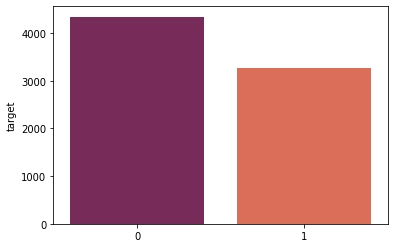

In [13]:
sns.barplot(train_data['target'].value_counts().index,train_data['target'].value_counts(),palette='rocket')

Exploring the keyword feature from training data:

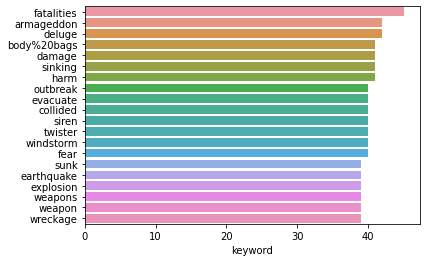

In [14]:
sns.barplot(y=train_data['keyword'].value_counts()[:20].index,x=train_data['keyword'].value_counts()[:20],
            orient='h')

Let's look at the location column with some feature processing:

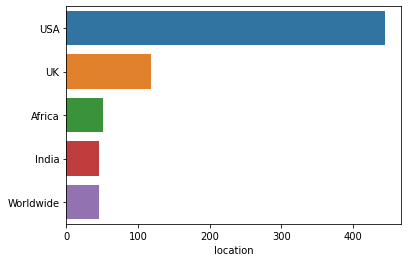

In [15]:
# Replacing the ambigious locations name with Standard names
train_data['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

sns.barplot(y=train_data['location'].value_counts()[:5].index,x=train_data['location'].value_counts()[:5],
            orient='h')

### <a name="vectorization"></a>  **5. Transforming tokens to a vector**
After the initial preprocessing phase, we need to transform text into a meaningful vector (or array) of numbers. This can be done by a number of tecniques:

### Bag of Words

The bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

Why is it is called a “bag” of words? That is because any information about the order or structure of words in the document is discarded and the model is only concerned with whether the known words occur in the document, not where they occur in the document.

For example, 

![](https://imgur.com/jWqtRP1.png)

*source:[Natural Language Processing course on coursera](https://www.coursera.org/learn/language-processing/home/welcome)*

We can do this using scikit-learn's CountVectorizer, where every row will represent a different tweet and every column will represent a different word.

### Bag of Words - Countvectorizer Features

[Countvectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) converts a collection of text documents to a matrix of token counts. It is important to note here that CountVectorizer comes with a lot of options to automatically do preprocessing, tokenization, and stop word removal.However, i did all the process manually above to just get a better understanding. Let's use a vanilla implementation of the countvectorizer without specifying any parameters.

### **6. Building a Text Classification model using Logistic Regression:**

Now the data is ready to be fed into a classification model. Let's create a basic claasification model using commonly used classification algorithms and see how our model performs.

In [16]:
#After the preprocessing, we will use vectorizer to convert text into words and apply classification

count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(xtrain)
test_vectors = count_vectorizer.transform(xtest)

#Count vectorizer has some limitations which can be overcome using TF-IDF which we will be using in the next section

# Fitting a simple Logistic Regression on Counts
clf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf, train_vectors, ytrain, cv=3, scoring="accuracy")
print(f"The mean accuracy score is: {sum(scores)/3}")

The mean accuracy score is: 0.7949196950275125


### **TFIDF Features**

A problem with the Bag of Words approach is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content”. Also, it will give more weight to longer documents than shorter documents.

One approach is to rescale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called Term Frequency-Inverse Document Frequency, or TF-IDF for short, where:

**Term Frequency: is a scoring of the frequency of the word in the current document.**

```
TF = (Number of times term t appears in a document)/(Number of terms in the document)
```

**Inverse Document Frequency: is a scoring of how rare the word is across documents.**

```
IDF = 1+log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
```

In [17]:
# Use TFIDF for preprocessing and classification both on example dataset

#We can use Tfidf vectorizer for preprocessing as shown below, it removes stop words, tokenizes the words as well as apply tfidf method to convert text into vectors
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to full dataset
example_tfv =  tfv.fit_transform(example_data['text'])

## Task 2: Use TF-IDF for preprocessing and classification on the given dataset

*Hint 1:* First define tfidfvectorizer, then fit transform on train_data

In [ ]:
#We have train_data as text which requires preprocessing and vectorization, apply tfidfvectorizer with suitable arguments to perform the task

#raw data
train_data['text'] = train_data_orig['text'].copy()



############# TODO: write code to apply TFidfVectorizer ######################

tfv = # <write from here> 
train_data_tfv = # <write something here too>    

###############################################################################



#Split into train, test
xtrain, xtest, ytrain, ytest = train_test_split(train_data_tfv, train_data.target.values,  
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

#Now we will use XGBoost classifier for classification
clf_xgb_TFIDF = xgb.XGBClassifier(max_depth=10, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)

scores = model_selection.cross_val_score(clf_xgb_TFIDF, xtrain, ytrain, cv=3, scoring="accuracy")
print(f"The mean accuracy score for XGBoost is: {sum(scores)/3}")

#LogisticRegression classifier 
clf = LogisticRegression(C=1.0)

scores = model_selection.cross_val_score(clf, xtrain, ytrain, cv=3, scoring="accuracy")
print(f"The mean accuracy score for LogisticRegression is: {sum(scores)/3}")

### **Introducing XGBoost**

![img.png](https://analyticsindiamag.com/wp-content/uploads/2020/11/xgboost.png)
XGBoost is an optimized Gradient Boosting Machine Learning library. It is originally written in C++, but has API in several other languages. The core XGBoost algorithm is parallelizable i.e. it does parallelization within a single tree. There are some of the advantages of using XGBoost: </br>
* It is one of the most powerful algorithms with high speed and performance.
* It can harness all the processing power of modern multicore computers.
* It is feasible to train on large datasets.
* Consistently outperform all single algorithm methods.

We will be using XGBoost as one of our classifiers:

In [18]:
#@title Task 2 TFIDFVectorizer solution { display-mode: "form" }
#We have train_data as text which requires preprocessing and vectorization, apply tfidfvectorizer with suitable arguments to perform the task

#raw data
train_data['text'] = train_data_orig['text'].copy()


############# TODO: write code to apply TFidfVectorizer ######################

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

train_data_tfv =  tfv.fit_transform(train_data['text'])

###############################################################################

#Split into train, test
xtrain, xtest, ytrain, ytest = train_test_split(train_data_tfv, train_data.target.values,  
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

#Now we will use XGBoost classifier for classification
clf_xgb_TFIDF = xgb.XGBClassifier(max_depth=10, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)

scores = model_selection.cross_val_score(clf_xgb_TFIDF, xtrain, ytrain, cv=3, scoring="accuracy")
print(f"The mean accuracy score for XGBoost is: {sum(scores)/3}")

#LogisticRegression classifier 
clf = LogisticRegression(C=1.0)

scores = model_selection.cross_val_score(clf, xtrain, ytrain, cv=3, scoring="accuracy")
print(f"The mean accuracy score for LogisticRegression is: {sum(scores)/3}")

The mean accuracy score for XGBoost is: 0.7757983767428432
The mean accuracy score for LogisticRegression is: 0.7976919048608986


# Bonus Round (No task dw)!!!
We will be looking at BERT to extract vector embeddings from text and take a look at whats all this hype around DEEP LEARNING, enjoy the ride, there is no task, (which reminds me of *don't forget to wear mask in college if you happen to go there*), sorry for the bad pun.

### **BERT:**
At the end of 2018 researchers at Google AI Language open-sourced a new technique for Natural Language Processing (NLP) called BERT (Bidirectional Encoder Representations from Transformers) —  a major breakthrough which took the Deep Learning community by storm because of its incredible performance.

We will be using BERT transformer model for this section from HuggingFace which provides opensource pretrained models. You can check this link to understand more about [HuggingFace transformers](https://huggingface.co/transformers/pretrained_models.html)
</br>
Following are the basic steps involved in using any transformer,</br>
* **For preprocessing:**

    Tokenize the input data and other input details such as Attention Mask for BERT to not ignore the attention on padded sequences.

    Convert tokens to input ID sequences.
    
    Pad the IDs to a fixed length.

* **For modelling:**

    Load the model and feed in the input ID sequence (Do it batch wise suitably based on the memory available).
    Get the output of the last hidden layer
    Last hidden layer has the sequence representation embedding at 0th index, hence we address the output as last_hidden_layer[0].
    These embeddings can be used as the inputs for different machine learning or deep learning models.

Using BERT Transformer


In [19]:
!pip install -q transformers

     |████████████████████████████████| 2.9 MB 6.6 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 895 kB 63.6 MB/s 
     |████████████████████████████████| 3.3 MB 48.4 MB/s 
     |████████████████████████████████| 636 kB 83.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

from transformers import BertTokenizer, BertModel

MODEL_TYPE = 'bert-base-uncased'
MAX_SIZE = 150
BATCH_SIZE = 200

tokenizer = BertTokenizer.from_pretrained(MODEL_TYPE)
model = BertModel.from_pretrained(MODEL_TYPE)

#Convert Text to Tokens
tokenized_input = train_data_orig['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

#Here 101 -> [CLS] and 102 -> [SEP], [CLS] token refers to the classification token. [SEP] refers to end of the sequence.
#Now let's pad the sequence to fixed length
padded_tokenized_input = np.array([i + [0]*(MAX_SIZE-len(i)) for i in tokenized_input.values])

#Let's tell BERT to ignore attention on padded inputs.
attention_masks  = np.where(padded_tokenized_input != 0, 1, 0)

input_ids = torch.tensor(padded_tokenized_input)  
attention_masks = torch.tensor(attention_masks)

#get the sequence embeddings
all_train_embedding = []
#shrink data
input_ids = input_ids[:200]

with torch.no_grad():
  for i in tqdm(range(0,len(input_ids),200)):    
    last_hidden_states = model(input_ids[i:min(i+200,len(train_data_orig))], attention_mask = attention_masks[i:min(i+200,len(train_data_orig))])[0][:,0,:].numpy()
    all_train_embedding.append(last_hidden_states)

unbatched_train = []
for batch in all_train_embedding:
    for seq in batch:
        unbatched_train.append(seq)

train_labels = train_data['target'][:200]
#Now we have training embeddings which we can use for training almost any machine learning algorithm and get a good score (hopefully)

**Double Bonus Round for Nerds:**
Submit your first solution to the Kaggle competition [here](https://www.kaggle.com/c/nlp-getting-started/submit)
```python
def submission(submission_file_path,model,test_vectors):
    sample_submission = pd.read_csv(submission_file_path)
    sample_submission["target"] = clf.predict(test_vectors)
    sample_submission.to_csv("submission.csv", index=False)

#1. download the test data from competition page

#2. get submission file from kaggle competition page
submission_file_path = "../input/nlp-getting-started/sample_submission.csv"
test_vectors=test_tfidf
#3. run the trained model on test data and save submission in above format, and boom, You just became a Kaggler doing ML 
submission(submission_file_path,clf_NB_TFIDF,test_vectors)




### **References:**
* [Analytics India Xgboost blog](https://analyticsindiamag.com/xgboost-internal-working-to-make-decision-trees-and-deduce-predictions/)
* [Getting started with NLP - A general Intro](https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro)
* [Approaching (Almost) Any NLP Problem on Kaggle](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle)
* [Knowledge Graph & NLP Tutorial-(BERT,spaCy,NLTK)](https://www.kaggle.com/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk)
* [NLP Getting started Kaggle competition](https://www.kaggle.com/c/nlp-getting-started)
* [HuggingFace Transformers - BERT for Beginners](https://www.kaggle.com/sourabhdattawad/huggingface-transformers-bert-for-beginners)

### Presented by: Jyot Makadiya, AI/ML Mentor, GDSC Nirma University